# NanoRetina Denoising 

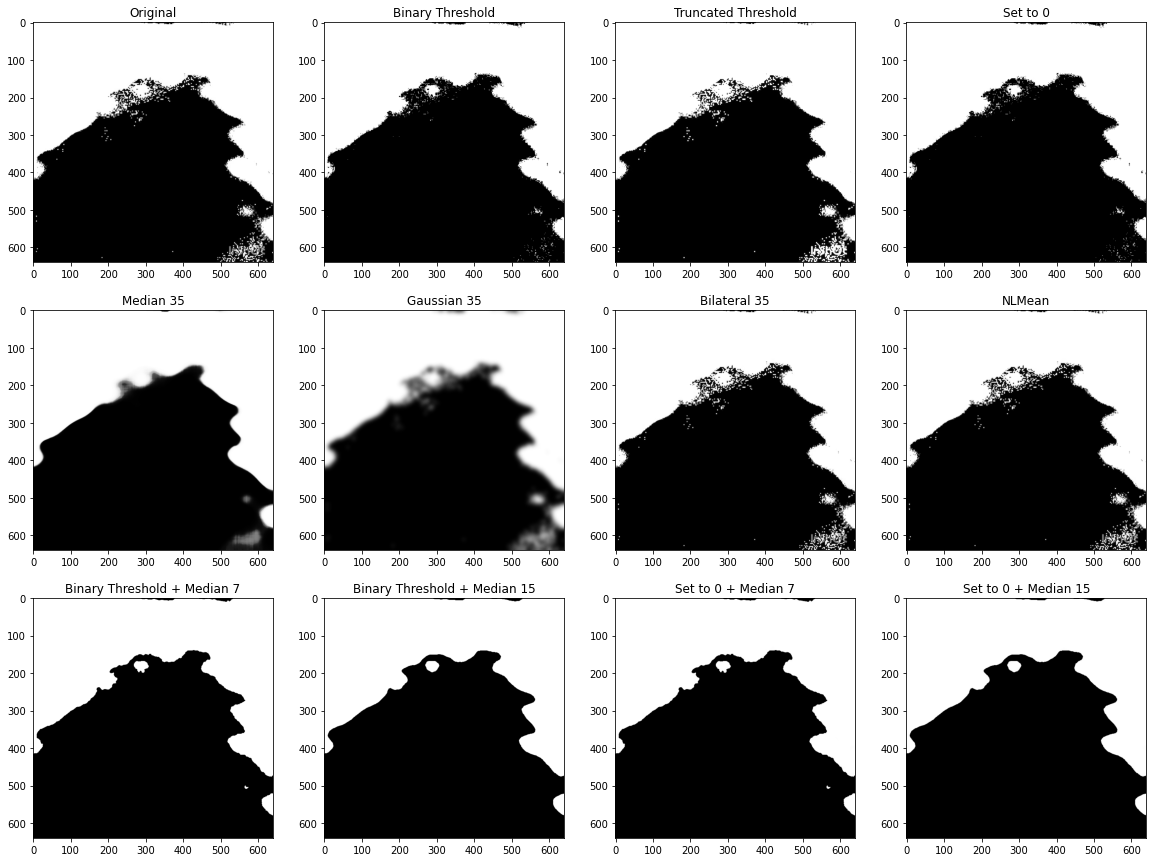

In [11]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

cap = cv2.VideoCapture('demo1.mp4')

# ------------------------------------------------------------------
# Processing:

ret, frame_bgr = cap.read()

frame = cv2.cvtColor(frame_bgr, cv2.COLOR_BGR2GRAY)

ret, thresh1 = cv2.threshold(frame, 250, 255, cv2.THRESH_BINARY)  # pixels > THR ==> 255, pixels < 255 ==> 0 
ret, thresh2 = cv2.threshold(frame, 120, 255, cv2.THRESH_TRUNC)   # pixels > THR ==> THR
ret, thresh3 = cv2.threshold(frame, 250, 255, cv2.THRESH_TOZERO)  # pixels < THR ==> 0
median = cv2.medianBlur(frame, 35)
gaussian = cv2.GaussianBlur(frame, (35,35), 0)
bilateral = cv2.bilateralFilter(frame, 35, 0, 0)
nlmean = cv2.fastNlMeansDenoising(frame, None, 10, 7, 21)
thresh1_median7 = cv2.medianBlur(thresh1,7)
thresh1_median15 = cv2.medianBlur(thresh1, 15)
thresh3_median7 = cv2.medianBlur(thresh3, 7)
thresh3_median15 = cv2.medianBlur(thresh3, 15)

# ------------------------------------------------------------------
# Visualization

fig, axes = plt.subplots(3, 4, figsize=(20,15))

axes[0][0].imshow(frame, cmap='gray')
axes[0][1].imshow(thresh1, cmap='gray')
axes[0][2].imshow(thresh2, cmap='gray')
axes[0][3].imshow(thresh3, cmap='gray')
axes[1][0].imshow(median, cmap='gray')
axes[1][1].imshow(gaussian, cmap='gray')
axes[1][2].imshow(bilateral, cmap='gray')
axes[1][3].imshow(nlmean, cmap='gray')
axes[2][0].imshow(thresh1_median7, cmap='gray')
axes[2][1].imshow(thresh1_median15, cmap='gray')
axes[2][2].imshow(thresh3_median7, cmap='gray')
axes[2][3].imshow(thresh3_median15, cmap='gray')

axes[0][0].set_title('Original')
axes[0][1].set_title('Binary Threshold')
axes[0][2].set_title('Truncated Threshold')
axes[0][3].set_title('Set to 0')
axes[1][0].set_title('Median 35')
axes[1][1].set_title('Gaussian 35')
axes[1][2].set_title('Bilateral 35')
axes[1][3].set_title('NLMean')
axes[2][0].set_title('Binary Threshold + Median 7')
axes[2][1].set_title('Binary Threshold + Median 15')
axes[2][2].set_title('Set to 0 + Median 7')
axes[2][3].set_title('Set to 0 + Median 15')

plt.show()

In [2]:
print('Completed Successfully')

Completed Successfully
